In [68]:
# Import libraries
from numpy.random import seed
import numpy as np
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from scipy.stats import pearsonr
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [25]:
# Load CSV using Pandas from URL
import matplotlib.pyplot as plt
from pandas import read_csv
data = pandas.read_csv("/Applications/Ranu_Imp_Skill_docs/JDA_task_Bike-Sharing-inPython/hour.csv")

In [26]:
# Summarize the Dataset 
print(data.shape)

(17379, 17)


In [27]:
# Description of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [28]:
# Peek at the Data
print(data.head(5))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [29]:
# Statistical Summary
print(data.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [30]:
# Drop columns
data_edit = data.drop(['instant', 'dteday'], axis=1)
data_edit.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


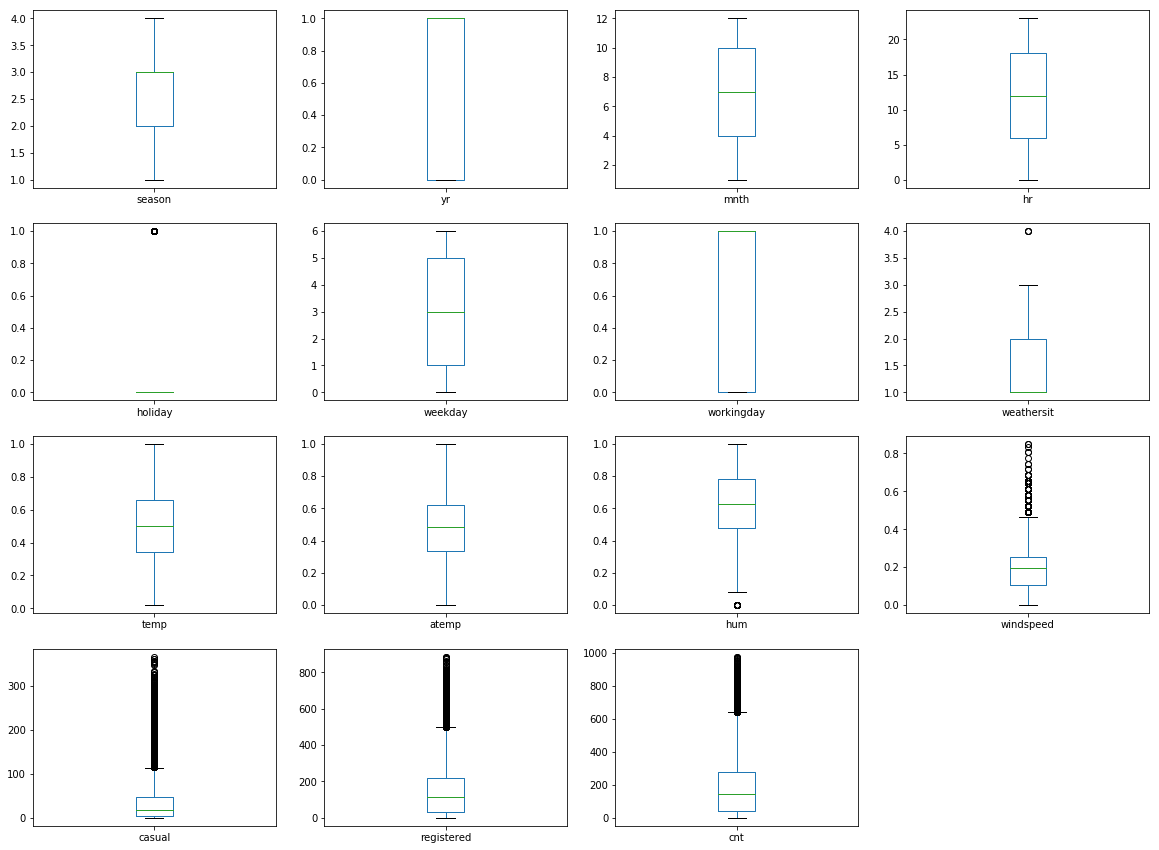

In [10]:
# Data Visualization: Univariate Plots (numerical data)
data_edit.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

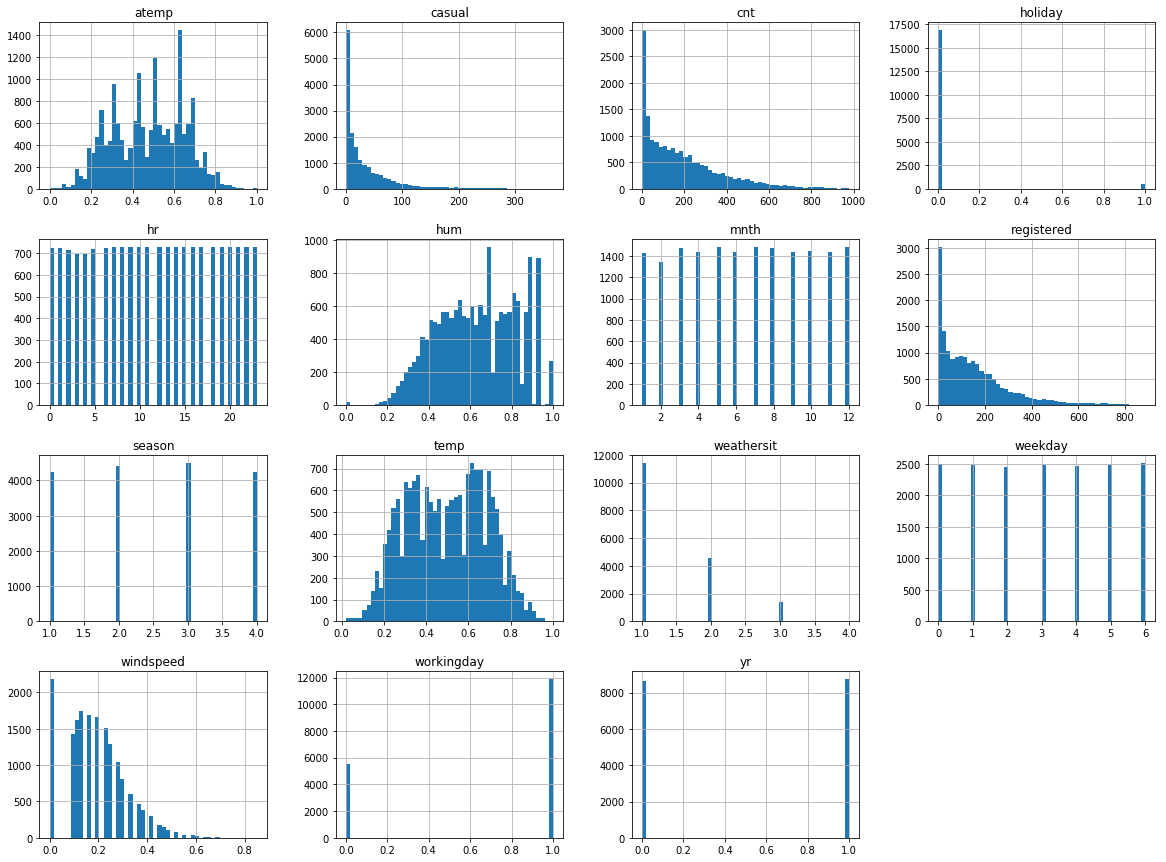

In [11]:
# histograms
data_edit.hist(bins=50, figsize= (20,15))
plt.show()

In [31]:
# Calculating the correlation values
corr_matrix = data_edit.corr()
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

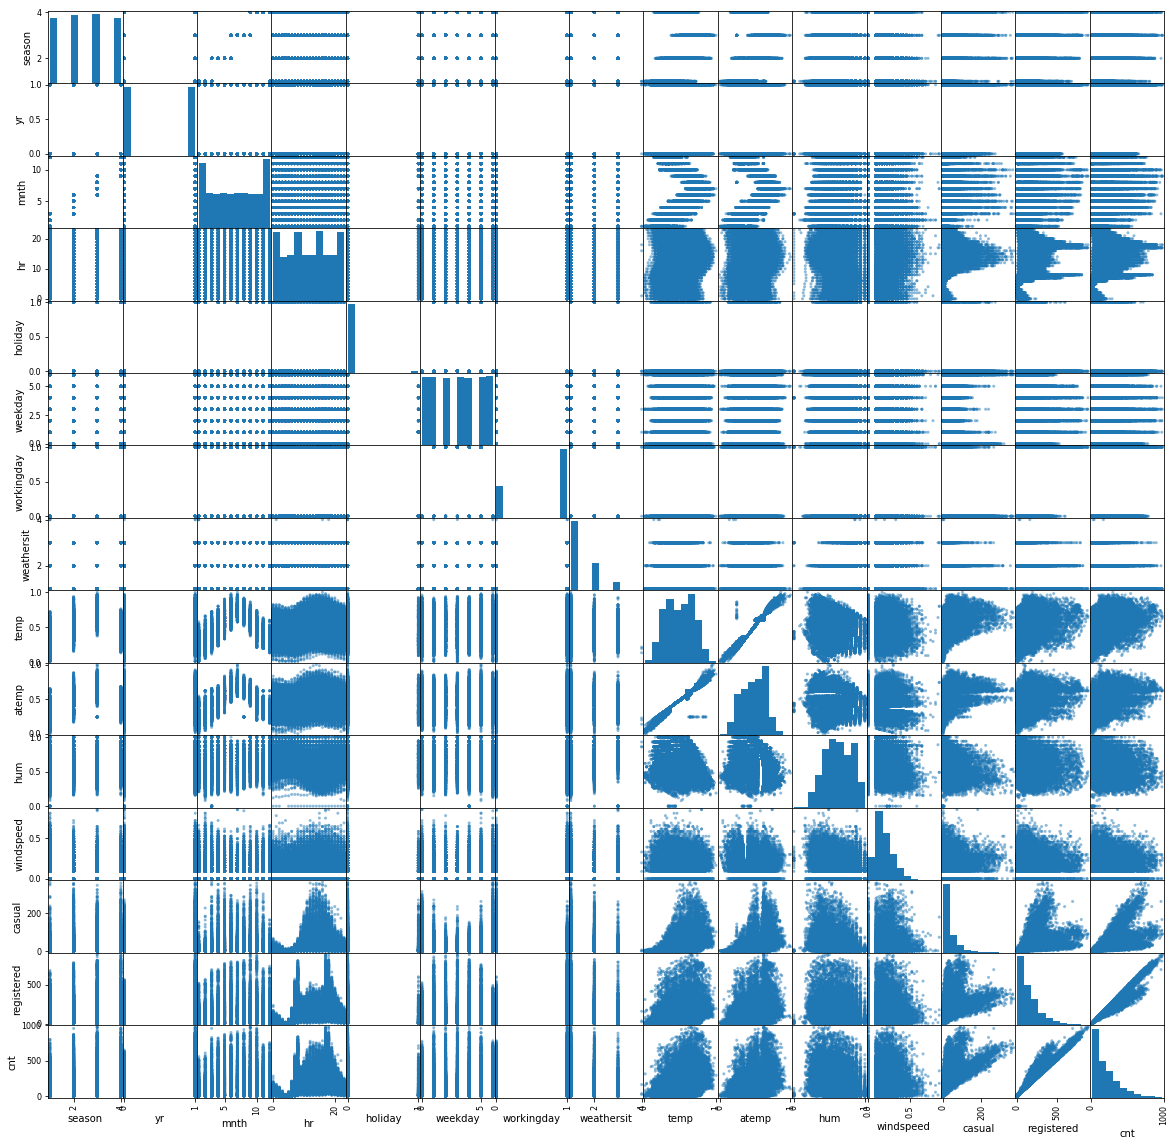

In [13]:
# Multivariate Plots

scatter_matrix(data_edit, figsize= (20, 20))
plt.show()

In [32]:
# Drop highly correlated columns
data_edit = data_edit.drop(['registered', 'casual', 'atemp'], axis=1)

In [33]:
# Create a test set
train_set, test_set = train_test_split(data_edit, test_size=0.2, random_state=42)
train_set.head()
test_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
12830,3,1,6,19,0,6,0,1,0.80,0.27,0.1940,425
8688,1,1,1,20,1,1,0,1,0.24,0.41,0.2239,88
7091,4,0,10,2,0,5,1,1,0.32,0.66,0.2836,4
12230,2,1,5,19,0,2,1,1,0.78,0.52,0.3582,526
431,1,0,1,0,0,4,1,1,0.26,0.56,0.3881,13


In [41]:
# Data preparation
bike = train_set.drop("cnt", axis = 1)
bike_labels = train_set["cnt"].copy()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
335,1,0,1,11,0,6,0,1,0.20,0.55,0.2239,72
7035,4,0,10,18,0,2,1,1,0.52,0.42,0.1045,518
8051,4,0,12,3,0,3,1,3,0.46,1.00,0.2239,3
2133,2,0,4,18,0,0,0,2,0.46,0.31,0.0000,172
8485,1,0,12,6,0,0,0,1,0.20,0.75,0.1045,1
12587,2,1,6,16,0,3,1,1,0.72,0.30,0.4925,392
399,1,0,1,15,0,2,1,2,0.22,0.87,0.1642,35
15527,4,1,10,4,0,0,0,1,0.42,0.77,0.2836,12
10546,1,1,3,13,0,2,1,1,0.60,0.78,0.1940,284
749,1,0,2,15,0,4,1,1,0.22,0.37,0.3284,60


In [58]:
# Model selection and training: Linear regression
lin_reg = LinearRegression()
lin_reg.fit(bike, bike_labels)

some_data = bike.iloc[:5]
some_labels = bike_labels.iloc[:5]

print("predictions:", lin_reg.predict(some_data))
print("labels:", list(some_labels))

bike_prediction = lin_reg.predict(bike)
lin_mse = mean_squared_error(bike_labels,bike_prediction)
lin_rmse = np.sqrt(lin_mse)


('predictions:', array([ 50.78206892, 276.94012888,  27.10136454, 226.41654613,
       -39.12630123]))
('labels:', [72, 518, 3, 172, 1])


142.55471466066638

In [67]:
# Model selection and training: Decision tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(bike, bike_labels)
bike_prediction_tree = tree_reg.predict(bike)
tree_mse = mean_squared_error(bike_labels,bike_prediction_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5989453436724405

In [74]:
# Cross validation
scores = cross_val_score(tree_reg, bike, bike_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std()) 
    
display_scores(tree_rmse_scores)

('Scores:', array([60.46327557, 60.96805919, 59.94474451, 58.74217689, 60.35414668,
       58.82082445, 57.60206456, 59.69256518, 56.39284261, 64.66872138]))
('Mean:', 59.76494210160945)
('Standard deviation:', 2.1060256885371937)


In [ ]:
# Try other models
